<a href="https://colab.research.google.com/github/KIRAN-MK-211/ML_B2_1BM19CS073_KIRAN_MK/blob/main/LabExam/MLLabExam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Kiran M K
#Semester: 6
#Section: B
#Question: Apply K Nearest Neiighbors Classifier for Abalone dataset
#Date: July 13, 2022 14:00 IST

#Importing libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

In [3]:
print(data)

      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]


In [4]:
lables = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.columns = lables

In [7]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [8]:
final_inp = data.drop('Sex', axis=1)

In [9]:
data.Rings.unique().shape

(28,)

In [10]:
final_labels = data.Sex

In [11]:
final_labels

0       M
1       F
2       M
3       I
4       I
       ..
4171    F
4172    M
4173    M
4174    F
4175    M
Name: Sex, Length: 4176, dtype: object

In [12]:
y = []
for i in final_labels:
  if i == 'M':
    y.append(0)
  if i == 'F':
    y.append(1)
  if i == 'I':
    y.append(2)

In [13]:
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(final_inp, y, test_size = 0.2)

In [15]:
X_test.shape

(836, 8)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
print(cm)

[[162  99  49]
 [150  94  18]
 [ 51  30 183]]


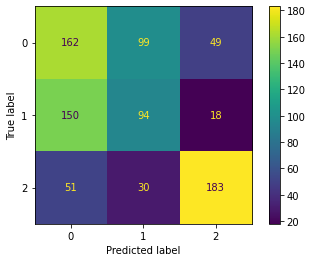

In [21]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_plot.plot()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       310
           1       0.42      0.36      0.39       262
           2       0.73      0.69      0.71       264

    accuracy                           0.53       836
   macro avg       0.53      0.52      0.53       836
weighted avg       0.53      0.53      0.52       836



In [23]:
knn.score(X_test, y_test)

0.5251196172248804

In [24]:
error = []
for i in range(3,8):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  error.append(knn.score(X_test, y_test))

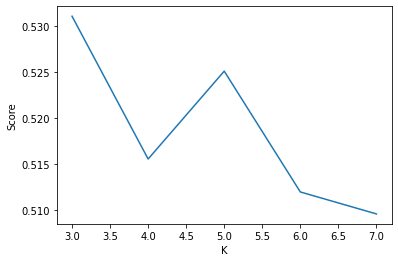

In [25]:
plt.xlabel('K')
plt.ylabel('Score')
plt.plot(np.arange(3,8), error)

In [ ]:
best_k = np.arange(3,8)[np.argmax(np.array(error))]

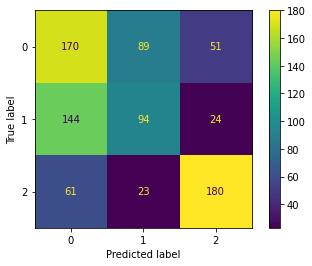

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_plot.plot()

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.55      0.50       310
           1       0.46      0.36      0.40       262
           2       0.71      0.68      0.69       264

    accuracy                           0.53       836
   macro avg       0.54      0.53      0.53       836
weighted avg       0.53      0.53      0.53       836



Final Result: Accuracy 0.53, best for k = 3

#REGRESSION

In [28]:
y1 = data.Rings
X1 = data.drop(['Rings','Sex'], axis=1)

In [29]:
y1 = y1 + 1.5

In [30]:
X1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)
error = []

In [32]:
y_train1 = np.array(y_train1)

In [33]:
for i in range(3,8):
  knnr = KNeighborsRegressor(n_neighbors = i)
  knnr.fit(X_train1, y_train1)
  error.append(knnr.score(X_test1, y_test1))

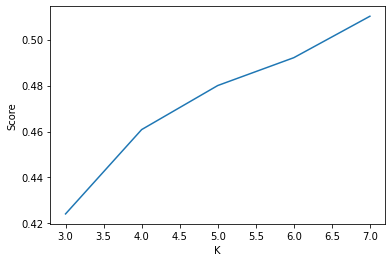

In [34]:
plt.ylabel('Score')
plt.xlabel('K')
plt.plot(np.arange(3,8), error)

In [35]:
knnr = KNeighborsRegressor(n_neighbors = 7)
knnr.fit(X_train1, y_train1)
score = knnr.score(X_test1, y_test1)
print(score)

0.5101833900841446


Final Result: R2 Score: 0.5101, best for k = 7